In [2]:
import numpy as np
import matplotlib.pyplot as plt
from rayoptics.optical.opticalmodel import OpticalModel
from rayoptics.gui.appcmds import open_model
%matplotlib widget

isdark = False

%matplotlib inline

from rayoptics.environment import *

In [3]:
## ThorLabs part 354710-C

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [5]:
dir_path = '/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/ray_optics_projects/'

In [6]:
opm, info = open_model(dir_path+"/354710-C-Zemax(ZMX).zmx", info=True)

In [ ]:
#for generating "interpolated glass" definition to add to smx file
rayoptics.seq.medium.InterpolatedGlass('D-ZK3M', cat='LightPath', pairs=[(2352.4, 1.555),(1970.1, 1.561),(1529.6, 1.568),(1128.6, 1.573),(1014.0, 1.575),(852.1, 1.578),(706.5, 1.582),(656.3, 1.583),(643.8, 1.584),(632.8, 1.584),(589.3, 1.586),(587.6,1.586),(546.1, 1.589),(486.1, 1.593),(480.0, 1.594),(435.8, 1.598),(404.7, 1.602),(365.0, 1.610)])

In [8]:
info

({'VERS': '140124 258 36214',
  'pupil': ('aperture', 'object', 'pupil'),
  'FTYP': '0 0 1 1 0 0 0',
  'STANDARD': 5,
  'EVENASPH': 1,
  'CONI': 1,
  'conj type': 'infinite',
  '# surfs': 6,
  '# wvls': 1,
  'fov': ('field', 'object', 'angle'),
  '# fields': 1,
  'GCAT': ['LIGHTPATH', 'SCHOTT'],
  'encoding': 'utf-16'},
 {'D-ZK3M': "InterpolatedGlass('D-ZK3M', cat='LightPath', wvls=[2352.4, 1970.1, 1529.6, 1128.6, 1014.0, 852.1, 706.5, 656.3, 643.8, 632.8, 589.3, 587.6, 546.1, 486.1, 480.0, 435.8, 404.7, 365.0], rndx=[1.555, 1.561, 1.568, 1.573, 1.575, 1.578, 1.582, 1.583, 1.584, 1.584, 1.586, 1.586, 1.589, 1.593, 1.594, 1.598, 1.602, 1.61])",
  'BK7': "create_glass('N-BK7','Schott')"})

In [9]:
#aliases for using rayoptics functions
sm = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [10]:
osp.spectral_region.wavelengths

[1550.0]

In [11]:
sm.list_model()

             c            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+10       air             1      0.0000
Stop:     1.182174     0.862527    D-ZK3M             1     0.75000
   2:     0.000000     0.523243       air             1     0.57417
   3:     0.000000     0.250000     N-BK7             1     0.24917
   4:     0.000000     0.249999       air             1     0.15527
 Img:     0.000000      0.00000                       1  8.9134e-06


In [16]:
sm.list_sg()

              c               mode        type        y       alpha
                      t           medium
 Obj:      0.00000                 
                1.00000e+10          air
Stop:      1.18217                 
                   0.862527       D-ZK3M
   2:      0.00000                 
                   0.523243          air
   3:      0.00000                 
                   0.250000        N-BK7
   4:      0.00000                 
                   0.249999          air
 Img:      0.00000                 


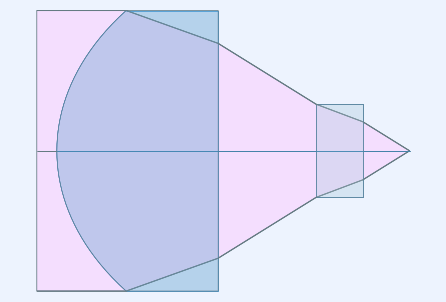

In [15]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

In [31]:
##apply translation in y to first surface of lens 
# define translation matricies for decenter
sm.ifcs[1].decenter = srf.DecenterData(DecenterType.LOCAL)
sm.ifcs[2].decenter = srf.DecenterData(DecenterType.REV)

In [32]:
# set second element of translation (y offset = dec[1], x=dec[0]??) to .2
sm.ifcs[1].decenter.dec[0] = .2
sm.ifcs[2].decenter.dec[0] = .2

In [ ]:
## in order to keep rays directed along axis when perturbing lens, set dummy plane separate from first (front) surface of lens]
opm.add_dummy_plane(idx=0)

In [46]:
sys_arg_2 = '1, 3, 5'

In [47]:
[int(i) for i in sys_arg_2.split(', ')]

[1, 3, 5]

In [26]:
sm.cur_surface
#set current surface (1 or newly created dummy plane) to stop
sm.set_stop()

1

In [33]:
sm.list_sg()

              c               mode        type        y       alpha
                      t           medium
 Obj:      0.00000                 
                1.00000e+10          air
Stop:      0.00000                       LOCAL     0.0000     0.0000
                    0.00000          air
   2:      1.18217                         REV     0.0000     0.0000
                   0.862527       D-ZK3M
   3:      0.00000                         REV    0.20000     0.0000
                   0.523243          air
   4:      0.00000                 
                   0.250000        N-BK7
   5:      0.00000                 
                   0.249999          air
 Img:      0.00000                 


In [34]:
opm.update_model()

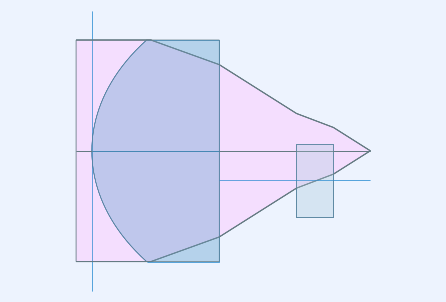

In [35]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()